# 画pdelay的源代码，抄自
D:\06_engineering\03_analysis\pj_gptp_simulation\old_version\other_main_test\main20250320\main20250320.ipynb

In [ ]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/3/20 10:30
*  @Project :   pj_gptp_simulation
*  @Description :   Visualize simulation results from CSV
*  @FileName:   data_visualizer.py
**************************************
"""
import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def load_sync_data(filename="output_data/simulation_results.csv"):
    data = defaultdict(list)
    with open(filename, "r") as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            tas_id = int(row["TAS_ID"])
            time = float(row["Time"])
            error = float(row["Time_Error"])
            data[tas_id].append((time, error))
    return data

def load_propagation_delay_data(filename="output_data/propagation_delay.csv"):
    measurements = []
    delays = []
    avg_delays = []
    with open(filename, "r") as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            measurements.append(int(row["Measurement"]))
            delays.append(float(row["Delay"]))
            avg_delays.append(float(row["Cumulative_Avg"]))
    return measurements, delays, avg_delays

def analyze_and_plot(sync_data, precision_thresholds=[0.5e-6, 1e-6, 1.5e-6, 2e-6]):
    # 同步精度概率分析
    precision_probabilities = {threshold: {} for threshold in precision_thresholds}

    for threshold in precision_thresholds:
        for tas_id in sync_data:
            in_sync_count = sum(1 for _, error in sync_data[tas_id] if error < threshold)
            total_count = len(sync_data[tas_id])
            probability = in_sync_count / total_count if total_count > 0 else 0
            precision_probabilities[threshold][tas_id] = probability

    # 确保输出目录存在
    import os
    os.makedirs("output_image", exist_ok=True)

    # 绘制同步精度概率图
    plt.figure(figsize=(10, 6))
    for threshold in precision_thresholds:
        tas_ids = list(precision_probabilities[threshold].keys())
        probabilities = list(precision_probabilities[threshold].values())
        plt.plot(tas_ids, probabilities, label=f'< {threshold * 1e6:.1f} μs')

    plt.xlabel('Time-Aware System ID')
    plt.ylabel('Probability of Synchronization')
    plt.title('Probability of Synchronization within Different Precision Thresholds')
    plt.legend()
    plt.grid(True)
    plt.savefig('output_image/sync_probability.png')
    plt.show()
    plt.close()

    # 绘制时间误差分布图（最后一个设备）
    last_tas_id = max(sync_data.keys())
    errors = [error for _, error in sync_data[last_tas_id]]

    plt.figure(figsize=(10, 6))
    plt.hist(np.array(errors) * 1e6, bins=50, alpha=0.7)
    plt.xlabel('Time Deviation (μs)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Time Deviation for TAS {last_tas_id}')
    plt.grid(True)
    plt.savefig('output_image/time_deviation_distribution.png')
    plt.show()
    plt.close()

    # 绘制1μs同步概率曲线
    tas_ids = list(precision_probabilities[1e-6].keys())
    probabilities = list(precision_probabilities[1e-6].values())

    plt.figure(figsize=(10, 6))
    plt.plot(tas_ids, probabilities)
    plt.xlabel('Time-Aware System ID')
    plt.ylabel('Probability of Synchronization')
    plt.title('Probability of Synchronization within 1 μs')
    plt.grid(True)
    plt.savefig('output_image/sync_probability_1us.png')
    plt.show()
    plt.close()

    # 返回结果
    return precision_probabilities

def plot_propagation_delay(measurements, delays, avg_delays):
    # 确保输出目录存在
    import os
    os.makedirs("output_image", exist_ok=True)

    # 绘制传播延迟图
    plt.figure(figsize=(10, 6))
    plt.plot(delays, 'k-', label='Measured Delay')
    plt.plot(avg_delays, 'r-', label='Cumulative Average')
    # plt.axhline(y=50e-9, color='b', linestyle='--', label='Real Delay (50 ns)')
    plt.xlabel('Measurement Number')
    plt.ylabel('Propagation Delay (s)')
    plt.title('Propagation Delay Measurements')
    plt.legend()
    plt.grid(True)
    plt.savefig('output_image/propagation_delay.png')
    plt.show()
    plt.close()

    # 打印结果
    print(f"Average measured delay: {np.mean(delays) * 1e9:.3f} ns")
    print(f"Final cumulative average: {avg_delays[-1] * 1e9:.3f} ns")
    print(f"Min delay: {min(delays) * 1e9:.3f} ns")
    print(f"Max delay: {max(delays) * 1e9:.3f} ns")

if __name__ == "__main__":
    # 加载数据
    print("Loading simulation data...")
    sync_data = load_sync_data()
    measurements, delays, avg_delays = load_propagation_delay_data()

    # 绘制传播延迟图
    print("\nPlotting propagation delay results...")
    plot_propagation_delay(measurements, delays, avg_delays)

    # 分析并绘制同步结果
    print("\nAnalyzing and plotting synchronization results...")
    precision_probabilities = analyze_and_plot(sync_data)

    # 打印结果摘要
    print("\nVisualization completed!")
    print(f"Number of time-aware systems: {len(sync_data)}")
    
    # 打印不同跳数设备的同步精度概率
    for hop in [10, 30, 50, 100]:
        if hop in precision_probabilities[1e-6]:
            print(f"Probability of synchronization within 1 μs for TAS {hop}: {precision_probabilities[1e-6][hop]:.4f}")

    print("\nResults saved as images:")


进行pdelay的

In [ ]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/3/20 10:30
*  @Project :   pj_gptp_simulation
*  @Description :   Visualize simulation results from CSV
*  @FileName:   data_visualizer.py
**************************************
"""
import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def load_propagation_delay_data(filename="output_data/propagation_delay.csv"):
    measurements = []
    delays = []
    avg_delays = []
    with open(filename, "r") as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            measurements.append(int(row["Measurement"]))
            delays.append(float(row["Delay"]))
            avg_delays.append(float(row["Cumulative_Avg"]))
    return measurements, delays, avg_delays

def plot_propagation_delay(measurements, delays, avg_delays):
    # 确保输出目录存在
    import os
    os.makedirs("output_image", exist_ok=True)

    # 设置颜色 (RGB值除以255得到0-1范围)
    delay_color = (53/255, 78/255, 151/255)  # RGB(053,078,151)
    avg_delay_color = (223/255, 91/255, 63/255)  # RGB(223,091,063)

    # 绘制传播延迟图
    plt.figure(figsize=(10, 6))
    plt.plot(delays, color=delay_color, linestyle='-', label='Measured Delay', linewidth=2)  # 增加 linewidth 参数
    plt.plot(avg_delays, color=avg_delay_color, linestyle='-', label='Cumulative Average', linewidth=2)  # 增加 linewidth 参数
    # plt.axhline(y=50e-9, color='b', linestyle='--', label='Real Delay (50 ns)')
    
    # 设置图表元素
    plt.xlabel('Measurement Number', fontsize=20, fontweight='bold')
    plt.ylabel('Propagation Delay (s)', fontsize=20, fontweight='bold')
    plt.title('Propagation Delay Measurements', fontsize=20, fontweight='bold')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlim(0,1000)
    
    # 添加图例和网格
    plt.legend(fontsize=20, frameon=True, shadow=False, edgecolor='black')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    
    plt.savefig('output_image/propagation_delay.png')
    plt.show()
    plt.close()

    # 打印结果
    print(f"Average measured delay: {np.mean(delays) * 1e9:.3f} ns")
    print(f"Final cumulative average: {avg_delays[-1] * 1e9:.3f} ns")
    print(f"Min delay: {min(delays) * 1e9:.3f} ns")


if __name__ == "__main__":
    # 加载数据
    print("Loading simulation data...")
    sync_data = load_sync_data()
    measurements, delays, avg_delays = load_propagation_delay_data()

    # 绘制传播延迟图
    print("\nPlotting propagation delay results...")
    plot_propagation_delay(measurements, delays, avg_delays)



# PDelay 的生成


In [1]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/3/20 10:30
*  @Project :   pj_gptp_simulation
*  @Description :   Description
*  @FileName:   main20250320.py
**************************************
"""
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


class TimeAwareSystem:
    def __init__(self, id, initial_drift_rate=None):
        self.id = id
        # 随机初始化时钟漂移率 [-10, 10] ppm
        if initial_drift_rate is None:
            self.initial_drift_rate = np.random.uniform(-10e-6, 10e-6)
        else:
            self.initial_drift_rate = initial_drift_rate

        self.drift_rate = self.initial_drift_rate
        self.drift_rate_change = 0
        self.clock_time = 0
        self.last_sync_time = 0
        self.neighbor_rate_ratio = 1.0

        # 传播延迟测量结果
        self.propagation_delay = 0
        self.propagation_delay_history = []

        # 同步记录
        self.time_errors = []

    def update_clock(self, time_step):
        # 更新时钟漂移率变化 (最大1ppm/s)
        self.drift_rate_change += np.random.uniform(0, 1e-6 * time_step)
        self.drift_rate = self.initial_drift_rate + self.drift_rate_change

        # 更新时钟时间
        self.clock_time += time_step * (1 + self.drift_rate)

    def calculate_neighbor_rate_ratio(self, previous_tas):
        # 计算邻居速率比
        exact_ratio = (1 + previous_tas.drift_rate) / (1 + self.drift_rate)
        # 添加最大0.1ppm的误差
        error = np.random.uniform(-0.1e-6, 0.1e-6)
        self.neighbor_rate_ratio = exact_ratio + error
        return self.neighbor_rate_ratio

    def measure_propagation_delay(self, previous_tas, real_delay=50e-9):
        # PHY抖动 [0, 8] ns
        jitter1 = np.random.uniform(0, 8e-9)
        jitter2 = np.random.uniform(0, 8e-9)
        jitter3 = np.random.uniform(0, 8e-9)
        jitter4 = np.random.uniform(0, 8e-9)

        # 时钟粒度 8ns
        granularity = 8e-9

        # t1: 发送Pdelay_Req的时间
        t1 = self.clock_time + np.random.uniform(0, granularity)

        # t2: 接收Pdelay_Req的时间
        t2_perfect = t1 * (1 + self.drift_rate) / (1 + previous_tas.drift_rate) + real_delay + jitter1
        t2 = t2_perfect - (t2_perfect % granularity) + np.random.uniform(0, granularity)

        # t3: 发送Pdelay_Resp的时间
        t3 = t2 + 1e-3  # 1ms的驻留时间

        # t4: 接收Pdelay_Resp的时间
        t4_perfect = t3 * (1 + previous_tas.drift_rate) / (1 + self.drift_rate) + real_delay + jitter2
        t4 = t4_perfect - (t4_perfect % granularity) + np.random.uniform(0, granularity)

        # 根据公式(4)计算传播延迟
        measured_delay = 0.5 * ((t4 - t1) - self.neighbor_rate_ratio * (t3 - t2))
        self.propagation_delay = measured_delay
        self.propagation_delay_history.append(measured_delay)

        # 使用累积平均值
        if len(self.propagation_delay_history) > 1:
            self.propagation_delay = np.mean(self.propagation_delay_history)

        return self.propagation_delay

    def receive_sync(self, previous_tas, gm_time, sync_info):
        # 记录接收时间
        receive_time = self.clock_time

        # PHY抖动
        jitter = np.random.uniform(0, 8e-9)

        # 时钟粒度
        granularity = 8e-9
        receive_time_with_error = receive_time + jitter
        receive_time_with_error = receive_time_with_error - (receive_time_with_error % granularity) + np.random.uniform(
            0, granularity)

        # 提取同步信息
        origin_timestamp, correction_field, rate_ratio = sync_info

        # 更新速率比 - 公式(1)
        updated_rate_ratio = rate_ratio * self.neighbor_rate_ratio

        # 计算从接收到发送的驻留时间
        residence_time = np.random.uniform(0, 1e-3)  # 最大1ms

        # 更新修正字段 - 公式(2)
        updated_correction_field = correction_field + self.propagation_delay + (residence_time * updated_rate_ratio)

        # 计算主时钟时间 - 公式(3)
        estimated_gm_time = origin_timestamp + updated_correction_field

        # 计算并记录时间误差
        time_error = receive_time - estimated_gm_time
        self.time_errors.append((gm_time, time_error))

        # 更新本地时钟
        self.clock_time = estimated_gm_time
        self.last_sync_time = receive_time

        # 返回更新后的同步信息
        send_time = self.clock_time + residence_time
        return send_time, (origin_timestamp, updated_correction_field, updated_rate_ratio)


def run_simulation(num_tas=100, duration=100, sync_interval=31.25e-3, pdelay_interval=1.0):
    # 创建时间感知系统
    tas_list = [TimeAwareSystem(i) for i in range(num_tas + 1)]  # +1 for grandmaster

    # 主时钟
    grandmaster = tas_list[0]

    # 仿真时间
    current_time = 0
    next_sync_time = 0
    next_pdelay_time = 0

    # 用于存储结果的数据结构
    sync_precision_data = {i: [] for i in range(1, num_tas + 1)}

    # 主循环
    with tqdm(total=int(duration / sync_interval)) as pbar:
        while current_time < duration:
            # 更新所有时钟
            time_step = min(sync_interval / 10,
                            next_sync_time - current_time if next_sync_time > current_time else sync_interval / 10)
            for tas in tas_list:
                tas.update_clock(time_step)

            current_time += time_step

            # 执行同步
            if current_time >= next_sync_time:
                # 主时钟发送同步信息
                sync_time = grandmaster.clock_time
                sync_info = (sync_time, 0, 1.0)  # (origin_timestamp, correction_field, rate_ratio)

                # 沿链路传递同步信息
                for i in range(1, num_tas + 1):
                    prev_tas = tas_list[i - 1]
                    current_tas = tas_list[i]

                    # 如果这是第一次同步，先测量传播延迟
                    if not current_tas.propagation_delay_history:
                        current_tas.calculate_neighbor_rate_ratio(prev_tas)
                        current_tas.measure_propagation_delay(prev_tas)

                    # 接收同步信息并更新
                    _, sync_info = current_tas.receive_sync(prev_tas, grandmaster.clock_time, sync_info)

                    # 记录同步精度
                    time_error = abs(current_tas.clock_time - grandmaster.clock_time)
                    sync_precision_data[i].append((current_time, time_error))

                next_sync_time = current_time + sync_interval
                pbar.update(1)

            # 执行传播延迟测量
            if current_time >= next_pdelay_time:
                for i in range(1, num_tas + 1):
                    prev_tas = tas_list[i - 1]
                    current_tas = tas_list[i]
                    current_tas.calculate_neighbor_rate_ratio(prev_tas)
                    current_tas.measure_propagation_delay(prev_tas)

                next_pdelay_time = current_time + pdelay_interval

    return tas_list, sync_precision_data


def analyze_results(tas_list, sync_precision_data, precision_thresholds=[0.5e-6, 1e-6, 1.5e-6, 2e-6]):
    # 同步精度概率分析
    precision_probabilities = {threshold: {} for threshold in precision_thresholds}

    for threshold in precision_thresholds:
        for tas_id in sync_precision_data:
            in_sync_count = sum(1 for _, error in sync_precision_data[tas_id] if error < threshold)
            total_count = len(sync_precision_data[tas_id])
            probability = in_sync_count / total_count if total_count > 0 else 0
            precision_probabilities[threshold][tas_id] = probability

    # 绘制同步精度概率图
    plt.figure(figsize=(10, 6))
    for threshold in precision_thresholds:
        tas_ids = list(precision_probabilities[threshold].keys())
        probabilities = list(precision_probabilities[threshold].values())
        plt.plot(tas_ids, probabilities, label=f'< {threshold * 1e6:.1f} μs')

    plt.xlabel('Time-Aware System ID')
    plt.ylabel('Probability of Synchronization')
    plt.title('Probability of Synchronization within Different Precision Thresholds')
    plt.legend()
    plt.grid(True)
    plt.savefig('output_image/sync_probability.png')
    plt.close()

    # 绘制时间误差分布图（最后一个设备）
    last_tas_id = max(sync_precision_data.keys())
    errors = [error for _, error in sync_precision_data[last_tas_id]]

    plt.figure(figsize=(10, 6))
    plt.hist(np.array(errors) * 1e6, bins=50, alpha=0.7)
    plt.xlabel('Time Deviation (μs)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Time Deviation for TAS {last_tas_id}')
    plt.grid(True)
    plt.savefig('output_image/time_deviation_distribution.png')
    plt.close()

    # 绘制1μs同步概率曲线
    tas_ids = list(precision_probabilities[1e-6].keys())
    probabilities = list(precision_probabilities[1e-6].values())

    plt.figure(figsize=(10, 6))
    plt.plot(tas_ids, probabilities)
    plt.xlabel('Time-Aware System ID')
    plt.ylabel('Probability of Synchronization')
    plt.title('Probability of Synchronization within 1 μs')
    plt.grid(True)
    # plt.ylim(0, 1.05)
    plt.savefig('output_image/sync_probability_1us.png')
    plt.close()

    # 返回结果
    return precision_probabilities


def propagation_delay_simulation():
    # 模拟传播延迟测量
    tas1 = TimeAwareSystem(1, initial_drift_rate=5e-6)  # 5ppm
    tas2 = TimeAwareSystem(2, initial_drift_rate=-3e-6)  # -3ppm

    delays = []
    avg_delays = []
    cumulative_avg = 0

    for i in range(1000):
        tas1.update_clock(1.0)  # 更新1秒
        tas2.update_clock(1.0)

        tas2.calculate_neighbor_rate_ratio(tas1)
        delay = tas2.measure_propagation_delay(tas1)
        delays.append(delay)

        cumulative_avg = (cumulative_avg * i + delay) / (i + 1) if i > 0 else delay
        avg_delays.append(cumulative_avg)

    # 绘制传播延迟图
    plt.figure(figsize=(10, 6))
    plt.plot(delays, 'k-', label='Measured Delay')
    plt.plot(avg_delays, 'r-', label='Cumulative Average')
    plt.axhline(y=25e-9, color='b', linestyle='--', label='Real Delay (25 ns)')
    plt.xlabel('Measurement Number')
    plt.ylabel('Propagation Delay (s)')
    plt.title('Propagation Delay Measurements')
    plt.legend()
    plt.grid(True)
    # plt.ylim(0, 100e-9)
    plt.savefig('output_image/propagation_delay.png')
    plt.close()

    # 打印结果
    print(f"Average measured delay: {np.mean(delays) * 1e9:.3f} ns")
    print(f"Final cumulative average: {cumulative_avg * 1e9:.3f} ns")
    print(f"Min delay: {min(delays) * 1e9:.3f} ns")
    print(f"Max delay: {max(delays) * 1e9:.3f} ns")


if __name__ == "__main__":
    # 运行传播延迟仿真
    print("Running propagation delay simulation...")
    propagation_delay_simulation()

    # 运行主仿真
    print("\nRunning main simulation...")
    tas_list, sync_precision_data = run_simulation(num_tas=100, duration=1000, sync_interval=31.25e-3)

    # 分析结果
    print("\nAnalyzing results...")
    precision_probabilities = analyze_results(tas_list, sync_precision_data)

    # 打印结果摘要
    print("\nSimulation completed!")
    print(f"Number of time-aware systems: {len(tas_list) - 1}")
    print(f"Synchronization interval: 31.25 ms")

    # 打印不同跳数设备的同步精度概率
    for hop in [10, 30, 50, 100]:
        if hop in precision_probabilities[1e-6]:
            print(f"Probability of synchronization within 1 μs for TAS {hop}: {precision_probabilities[1e-6][hop]:.4f}")

    print("\nResults saved as images:")
    print("- sync_probability.png")
    print("- time_deviation_distribution.png")
    print("- sync_probability_1us.png")
    print("- propagation_delay.png")


Running propagation delay simulation...
Average measured delay: 53.94 ns
Final cumulative average: 53.94 ns
Min delay: 51.39 ns
Max delay: 54.45 ns

Running main simulation...


100%|██████████| 32000/32000 [01:34<00:00, 339.19it/s]



Analyzing results...

Simulation completed!
Number of time-aware systems: 100
Synchronization interval: 31.25 ms
Probability of synchronization within 1 μs for TAS 10: 0.0000
Probability of synchronization within 1 μs for TAS 30: 0.0000
Probability of synchronization within 1 μs for TAS 50: 0.0000
Probability of synchronization within 1 μs for TAS 100: 0.0000

Results saved as images:
- sync_probability.png
- time_deviation_distribution.png
- sync_probability_1us.png
- propagation_delay.png


# 计算TE的结果。

## 31.25ms

Simulating hop 1...
Simulating hop 2...
Simulating hop 3...
Simulating hop 4...
Simulating hop 5...
Simulating hop 6...
Simulating hop 7...
Simulating hop 8...
Simulating hop 9...
Simulating hop 10...
Simulating hop 11...
Simulating hop 12...
Simulating hop 13...
Simulating hop 14...
Simulating hop 15...
Simulating hop 16...
Simulating hop 17...
Simulating hop 18...
Simulating hop 19...
Simulating hop 20...
Simulating hop 21...
Simulating hop 22...
Simulating hop 23...
Simulating hop 24...
Simulating hop 25...
Simulating hop 26...
Simulating hop 27...
Simulating hop 28...
Simulating hop 29...
Simulating hop 30...
Simulating hop 31...
Simulating hop 32...
Simulating hop 33...
Simulating hop 34...
Simulating hop 35...
Simulating hop 36...
Simulating hop 37...
Simulating hop 38...
Simulating hop 39...
Simulating hop 40...
Simulating hop 41...
Simulating hop 42...
Simulating hop 43...
Simulating hop 44...
Simulating hop 45...
Simulating hop 46...
Simulating hop 47...
Simulating hop 48...
S

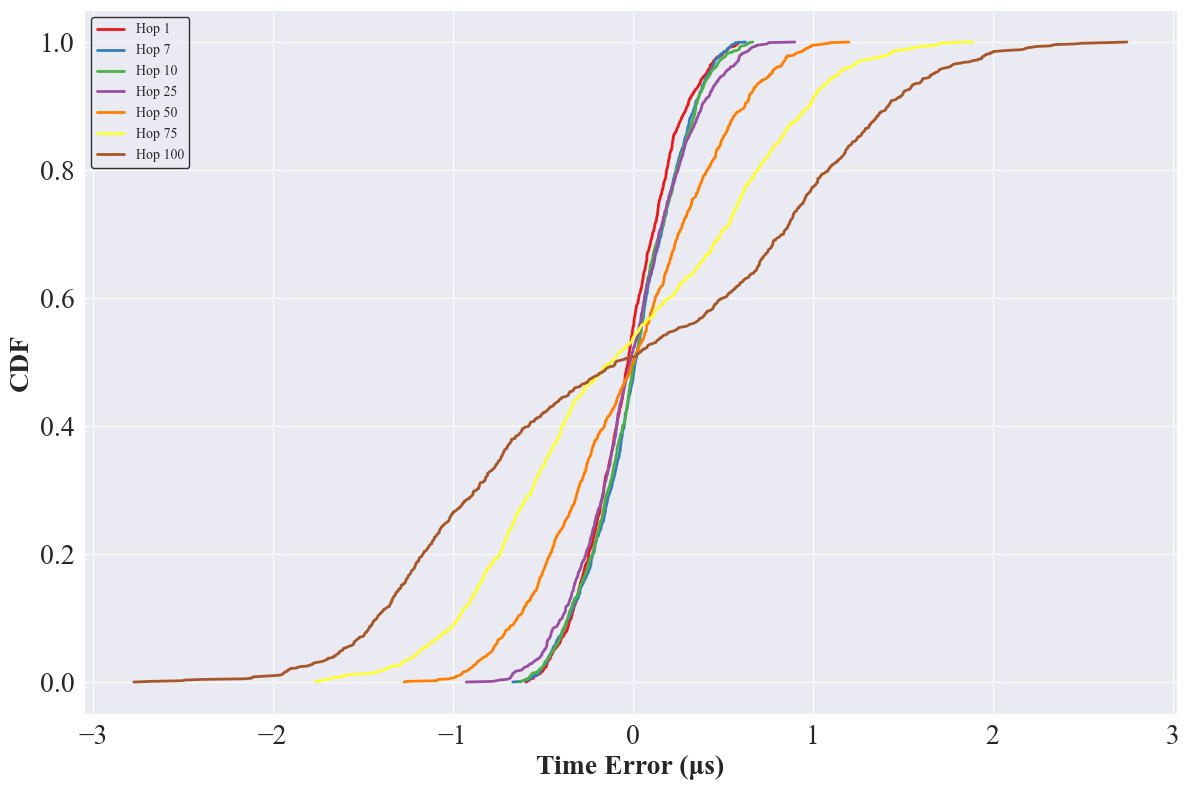

In [2]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/4/12 20:11
*  @Project :   pj_gptp_simulation
*  @Description :   从ieee8021as_simulation.py 拷贝来的版本
*  @FileName:   main.py
**************************************
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

# Create the output directory
os.makedirs("output_data", exist_ok=True)

# Parameters from the paper
PHY_JITTER_MAX = 8e-9  # 8 ns
CLOCK_GRANULARITY = 8e-9  # 8 ns
MAX_DRIFT_RATE = 10e-6  # 10 ppm
NR_ERROR = 0.1e-6  # 0.1 ppm
RESIDENCE_TIME_MAX = 1e-3  # 1 ms

PROPAGATION_DELAY = 25e-9  # 62 ns
SYNC_INTERVAL = 31.25e-3  # 31.25 ms
NUM_SAMPLES = 1000  # Samples per hop


def calculate_time_error(hops, sync_interval=SYNC_INTERVAL):
    """
    Calculate time synchronization error based on the paper's equations.
    """
    # Basic error from clock drift (equation 11)
    gm_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    node_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    basic_error = (node_drift - gm_drift) * sync_interval

    # Errors due to PHY jitter and clock granularity
    if hops > 1:
        # Timestamp error
        timestamp_error = np.random.uniform(0, PHY_JITTER_MAX) + np.random.uniform(0, CLOCK_GRANULARITY)

        # Error propagation factor based on equations (16)-(23)
        error_factor = np.random.uniform(0.5, 1.0)

        # Calculate accumulated error (grows with hop count)
        accumulated_error = timestamp_error * error_factor * hops

        # From Figure 10 - error grows faster after ~30 hops
        if hops > 30:
            accumulated_error *= 1 + (hops - 30) / 100
    else:
        accumulated_error = 0

    # Total error
    total_error = basic_error + accumulated_error

    # Randomize sign (error can be positive or negative)
    if np.random.random() < 0.5:
        total_error = -total_error

    return total_error


# Generate data for all hops (1-100)
all_data = {}
for h in range(1, 101):
    print(f"Simulating hop {h}...")
    hop_errors = [calculate_time_error(h) for _ in range(NUM_SAMPLES)]
    all_data[h] = hop_errors

# Save to CSV with each column representing one hop
df = pd.DataFrame({hop: all_data[hop] for hop in range(1, 101)})
df.to_csv("output_data/te_data_3125ms.csv", index=False)

# Target hops for plotting
target_hops = [1, 7, 10, 25, 50, 75, 100]
colors = {
    '1': '#E41A1C',  # 深红
    '2': '#377EB8',  # 深蓝
    '3': '#4DAF4A',  # 深绿
    '4': '#984EA3',  # 紫色
    '5': '#FF7F00',  # 橙色
    '6': '#FFFF33',  # 黄色
    '7': '#A65628'  # 棕色
}

# Create plot of time error distributions
plt.figure(figsize=(12, 8))

for i, hop in enumerate(target_hops):
    # Extract data for this hop and convert to microseconds
    errors = np.array(all_data[hop])
    errors_us = errors * 1e6

    # Sort errors for CDF plot
    sorted_errors = np.sort(errors_us)
    cumulative_prob = np.linspace(0, 1, len(sorted_errors))

    plt.plot(sorted_errors, cumulative_prob,
             label=f'Hop {hop}',
             color=colors[str(i + 1)],
             linewidth=2)

# Configure plot appearance
plt.grid(True)
plt.xlabel('Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('CDF', fontname='Times New Roman', fontsize=20, fontweight='bold')

plt.legend(fontsize=20, frameon=True, shadow=False, edgecolor='black',prop={'family': 'Times New Roman'})

plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)

plt.tight_layout()
plt.savefig("output_image/time_error_cdf_3125ms.png", dpi=600)
plt.show()


代码中定义了 NR_ERROR = 0.1e-6，但这个变量实际上没有在计算中被使用。要将它修改为表示 ±0.1 ppm 的范围，你需要在 calculate_time_error 函数中添加它的使用。

Simulating hop 1...
Simulating hop 2...
Simulating hop 3...
Simulating hop 4...
Simulating hop 5...
Simulating hop 6...
Simulating hop 7...
Simulating hop 8...
Simulating hop 9...
Simulating hop 10...
Simulating hop 11...
Simulating hop 12...
Simulating hop 13...
Simulating hop 14...
Simulating hop 15...
Simulating hop 16...
Simulating hop 17...
Simulating hop 18...
Simulating hop 19...
Simulating hop 20...
Simulating hop 21...
Simulating hop 22...
Simulating hop 23...
Simulating hop 24...
Simulating hop 25...
Simulating hop 26...
Simulating hop 27...
Simulating hop 28...
Simulating hop 29...
Simulating hop 30...
Simulating hop 31...
Simulating hop 32...
Simulating hop 33...
Simulating hop 34...
Simulating hop 35...
Simulating hop 36...
Simulating hop 37...
Simulating hop 38...
Simulating hop 39...
Simulating hop 40...
Simulating hop 41...
Simulating hop 42...
Simulating hop 43...
Simulating hop 44...
Simulating hop 45...
Simulating hop 46...
Simulating hop 47...
Simulating hop 48...
S

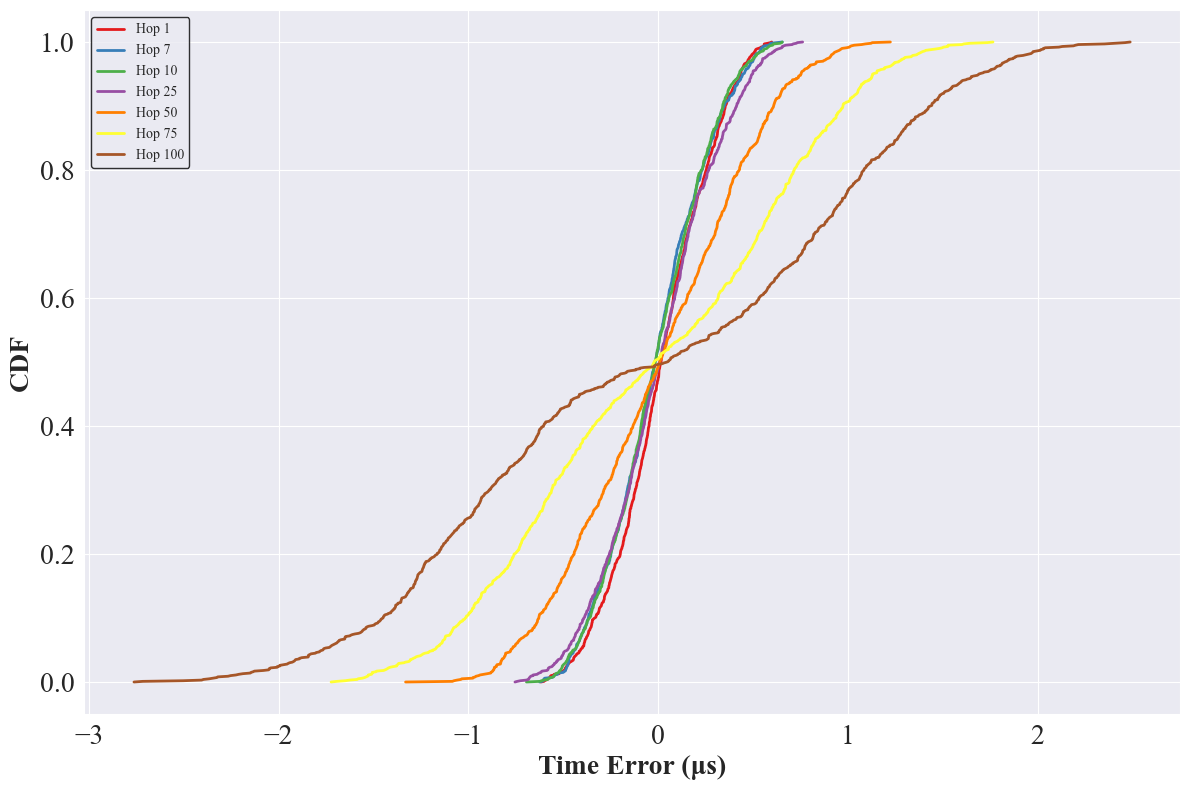

In [3]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/4/12 20:11
*  @Project :   pj_gptp_simulation
*  @Description :   从ieee8021as_simulation.py 拷贝来的版本
*  @FileName:   main.py
**************************************
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

# Create the output directory
os.makedirs("output_data", exist_ok=True)
os.makedirs("output_image", exist_ok=True)  # Added this to ensure the output_image directory exists

# Parameters from the paper
PHY_JITTER_MAX = 8e-9  # 8 ns
CLOCK_GRANULARITY = 8e-9  # 8 ns
MAX_DRIFT_RATE = 10e-6  # 10 ppm
NR_ERROR = 0.1e-6  # 0.1 ppm
RESIDENCE_TIME_MAX = 1e-3  # 1 ms
PROPAGATION_DELAY = 25e-9  # 62 ns
SYNC_INTERVAL = 31.25e-3  # 31.25 ms
NUM_SAMPLES = 1000  # Samples per hop


def calculate_time_error(hops, sync_interval=SYNC_INTERVAL):
    """
    Calculate time synchronization error based on the paper's equations.
    """
    # Basic error from clock drift (equation 11)
    gm_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    node_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    basic_error = (node_drift - gm_drift) * sync_interval
    
    # 添加 NR_ERROR 影响 (±0.1 ppm)
    nr_error_contribution = np.random.uniform(-NR_ERROR, NR_ERROR) * sync_interval

    # Errors due to PHY jitter and clock granularity
    if hops > 1:
        # Timestamp error
        timestamp_error = np.random.uniform(0, PHY_JITTER_MAX) + np.random.uniform(0, CLOCK_GRANULARITY)

        # Error propagation factor based on equations (16)-(23)
        error_factor = np.random.uniform(0.5, 1.0)

        # Calculate accumulated error (grows with hop count)
        accumulated_error = timestamp_error * error_factor * hops

        # From Figure 10 - error grows faster after ~30 hops
        if hops > 30:
            accumulated_error *= 1 + (hops - 30) / 100
    else:
        accumulated_error = 0

    # Total error (now including nr_error_contribution)
    total_error = basic_error + accumulated_error + nr_error_contribution

    # Randomize sign (error can be positive or negative)
    if np.random.random() < 0.5:
        total_error = -total_error

    return total_error


# Generate data for all hops (1-100)
all_data = {}
for h in range(1, 101):
    print(f"Simulating hop {h}...")
    hop_errors = [calculate_time_error(h) for _ in range(NUM_SAMPLES)]
    all_data[h] = hop_errors

# Save to CSV with each column representing one hop
df = pd.DataFrame({hop: all_data[hop] for hop in range(1, 101)})
df.to_csv("output_data/te_data_3125ms_v2.csv", index=False)

# Target hops for plotting
target_hops = [1, 7, 10, 25, 50, 75, 100]
colors = {
    '1': '#E41A1C',  # 深红
    '2': '#377EB8',  # 深蓝
    '3': '#4DAF4A',  # 深绿
    '4': '#984EA3',  # 紫色
    '5': '#FF7F00',  # 橙色
    '6': '#FFFF33',  # 黄色
    '7': '#A65628'  # 棕色
}

# Create plot of time error distributions
plt.figure(figsize=(12, 8))

for i, hop in enumerate(target_hops):
    # Extract data for this hop and convert to microseconds
    errors = np.array(all_data[hop])
    errors_us = errors * 1e6

    # Sort errors for CDF plot
    sorted_errors = np.sort(errors_us)
    cumulative_prob = np.linspace(0, 1, len(sorted_errors))

    plt.plot(sorted_errors, cumulative_prob,
             label=f'Hop {hop}',
             color=colors[str(i + 1)],
             linewidth=2)

# Configure plot appearance
plt.grid(True)
plt.xlabel('Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('CDF', fontname='Times New Roman', fontsize=20, fontweight='bold')

plt.legend(fontsize=20, frameon=True, shadow=False, edgecolor='black',prop={'family': 'Times New Roman'})

plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)

plt.tight_layout()
plt.savefig("output_image/time_error_cdf_3125ms_v2.png", dpi=600)
plt.show()

请帮我修改代码：
1、xy轴黑色显示。
2、全部白色背景，网格用灰色虚线。

Simulating hop 1...
Simulating hop 2...
Simulating hop 3...
Simulating hop 4...
Simulating hop 5...
Simulating hop 6...
Simulating hop 7...
Simulating hop 8...
Simulating hop 9...
Simulating hop 10...
Simulating hop 11...
Simulating hop 12...
Simulating hop 13...
Simulating hop 14...
Simulating hop 15...
Simulating hop 16...
Simulating hop 17...
Simulating hop 18...
Simulating hop 19...
Simulating hop 20...
Simulating hop 21...
Simulating hop 22...
Simulating hop 23...
Simulating hop 24...
Simulating hop 25...
Simulating hop 26...
Simulating hop 27...
Simulating hop 28...
Simulating hop 29...
Simulating hop 30...
Simulating hop 31...
Simulating hop 32...
Simulating hop 33...
Simulating hop 34...
Simulating hop 35...
Simulating hop 36...
Simulating hop 37...
Simulating hop 38...
Simulating hop 39...
Simulating hop 40...
Simulating hop 41...
Simulating hop 42...
Simulating hop 43...
Simulating hop 44...
Simulating hop 45...
Simulating hop 46...
Simulating hop 47...
Simulating hop 48...
S

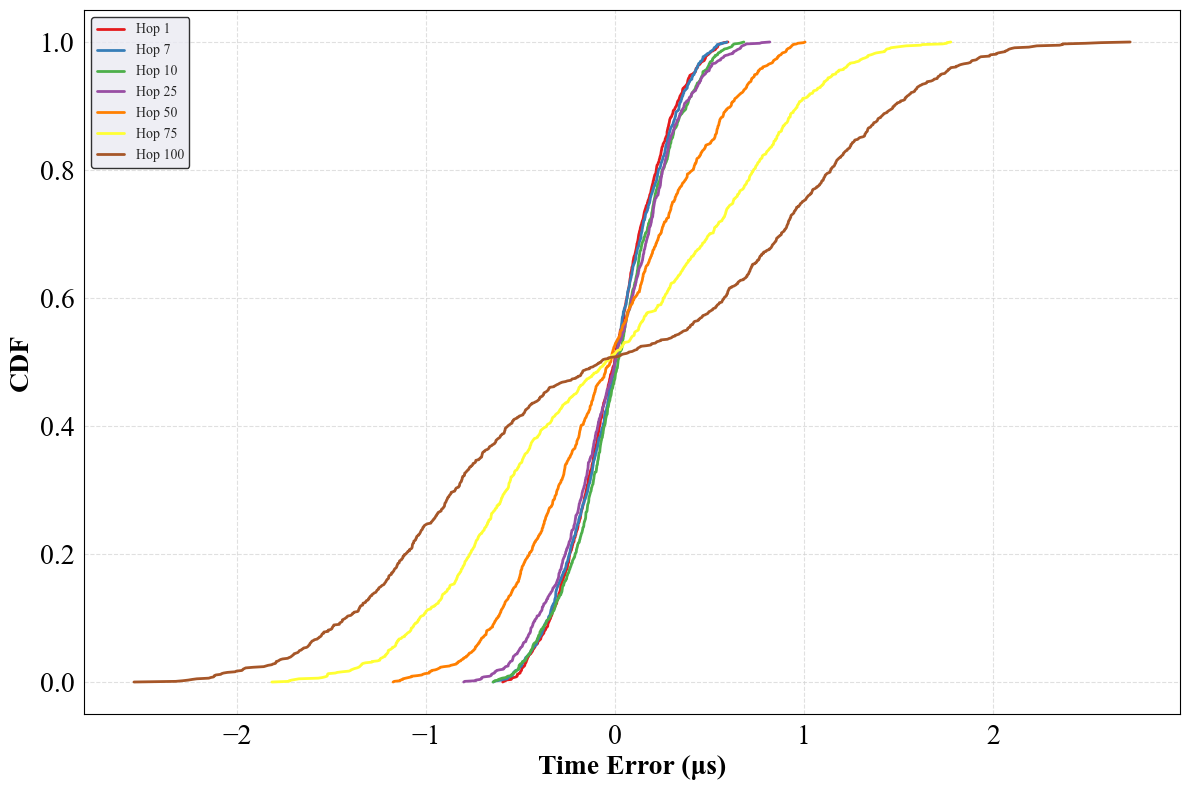

In [4]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/4/12 20:11
*  @Project :   pj_gptp_simulation
*  @Description :   从ieee8021as_simulation.py 拷贝来的版本
*  @FileName:   main.py
**************************************
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

# Create the output directory
os.makedirs("output_data", exist_ok=True)
os.makedirs("output_image", exist_ok=True)

# Parameters from the paper
PHY_JITTER_MAX = 8e-9  # 8 ns
CLOCK_GRANULARITY = 8e-9  # 8 ns
MAX_DRIFT_RATE = 10e-6  # 10 ppm
NR_ERROR = 0.1e-6  # 0.1 ppm
RESIDENCE_TIME_MAX = 1e-3  # 1 ms

PROPAGATION_DELAY = 25e-9  # 62 ns
SYNC_INTERVAL = 31.25e-3  # 31.25 ms
NUM_SAMPLES = 1000  # Samples per hop


def calculate_time_error(hops, sync_interval=SYNC_INTERVAL):
    """
    Calculate time synchronization error based on the paper's equations.
    """
    # Basic error from clock drift (equation 11)
    gm_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    node_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    basic_error = (node_drift - gm_drift) * sync_interval
    
    # 添加 NR_ERROR 影响 (±0.1 ppm)
    nr_error_contribution = np.random.uniform(-NR_ERROR, NR_ERROR) * sync_interval

    # Errors due to PHY jitter and clock granularity
    if hops > 1:
        # Timestamp error
        timestamp_error = np.random.uniform(0, PHY_JITTER_MAX) + np.random.uniform(0, CLOCK_GRANULARITY)

        # Error propagation factor based on equations (16)-(23)
        error_factor = np.random.uniform(0.5, 1.0)

        # Calculate accumulated error (grows with hop count)
        accumulated_error = timestamp_error * error_factor * hops

        # From Figure 10 - error grows faster after ~30 hops
        if hops > 30:
            accumulated_error *= 1 + (hops - 30) / 100
    else:
        accumulated_error = 0

    # Total error (now including nr_error_contribution)
    total_error = basic_error + accumulated_error + nr_error_contribution

    # Randomize sign (error can be positive or negative)
    if np.random.random() < 0.5:
        total_error = -total_error

    return total_error


# Generate data for all hops (1-100)
all_data = {}
for h in range(1, 101):
    print(f"Simulating hop {h}...")
    hop_errors = [calculate_time_error(h) for _ in range(NUM_SAMPLES)]
    all_data[h] = hop_errors

# Save to CSV with each column representing one hop
df = pd.DataFrame({hop: all_data[hop] for hop in range(1, 101)})
df.to_csv("output_data/te_data_3125ms_v3.csv", index=False)

# Target hops for plotting
target_hops = [1, 7, 10, 25, 50, 75, 100]
colors = {
    '1': '#E41A1C',  # 深红
    '2': '#377EB8',  # 深蓝
    '3': '#4DAF4A',  # 深绿
    '4': '#984EA3',  # 紫色
    '5': '#FF7F00',  # 橙色
    '6': '#FFFF33',  # 黄色
    '7': '#A65628'  # 棕色
}

# Create plot of time error distributions with modified styling
plt.figure(figsize=(12, 8), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for i, hop in enumerate(target_hops):
    # Extract data for this hop and convert to microseconds
    errors = np.array(all_data[hop])
    errors_us = errors * 1e6

    # Sort errors for CDF plot
    sorted_errors = np.sort(errors_us)
    cumulative_prob = np.linspace(0, 1, len(sorted_errors))

    plt.plot(sorted_errors, cumulative_prob,
             label=f'Hop {hop}',
             color=colors[str(i + 1)],
             linewidth=2)

# Configure plot appearance
plt.grid(True, linestyle='--', alpha=0.7, color='lightgray')  # 灰色虚线网格

# 设置坐标轴为黑色
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.xlabel('Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold', color='black')
plt.ylabel('CDF', fontname='Times New Roman', fontsize=20, fontweight='bold', color='black')

plt.legend(fontsize=20, frameon=True, shadow=False, edgecolor='black', prop={'family': 'Times New Roman'})

plt.xticks(fontname='Times New Roman', fontsize=20, color='black')
plt.yticks(fontname='Times New Roman', fontsize=20, color='black')

plt.tight_layout()
plt.savefig("output_image/time_error_cdf_3125ms_v3.png", dpi=600, facecolor='white')
plt.show()

添加 DRIFT_RATE_Chaned 参数表示时钟漂移率的变化范围（-1ppm/s 到 1ppm/s），修改代码来模拟时钟漂移率随时间的变化。

Simulating hop 1...
Simulating hop 2...
Simulating hop 3...
Simulating hop 4...
Simulating hop 5...
Simulating hop 6...
Simulating hop 7...
Simulating hop 8...
Simulating hop 9...
Simulating hop 10...
Simulating hop 11...
Simulating hop 12...
Simulating hop 13...
Simulating hop 14...
Simulating hop 15...
Simulating hop 16...
Simulating hop 17...
Simulating hop 18...
Simulating hop 19...
Simulating hop 20...
Simulating hop 21...
Simulating hop 22...
Simulating hop 23...
Simulating hop 24...
Simulating hop 25...
Simulating hop 26...
Simulating hop 27...
Simulating hop 28...
Simulating hop 29...
Simulating hop 30...
Simulating hop 31...
Simulating hop 32...
Simulating hop 33...
Simulating hop 34...
Simulating hop 35...
Simulating hop 36...
Simulating hop 37...
Simulating hop 38...
Simulating hop 39...
Simulating hop 40...
Simulating hop 41...
Simulating hop 42...
Simulating hop 43...
Simulating hop 44...
Simulating hop 45...
Simulating hop 46...
Simulating hop 47...
Simulating hop 48...
S

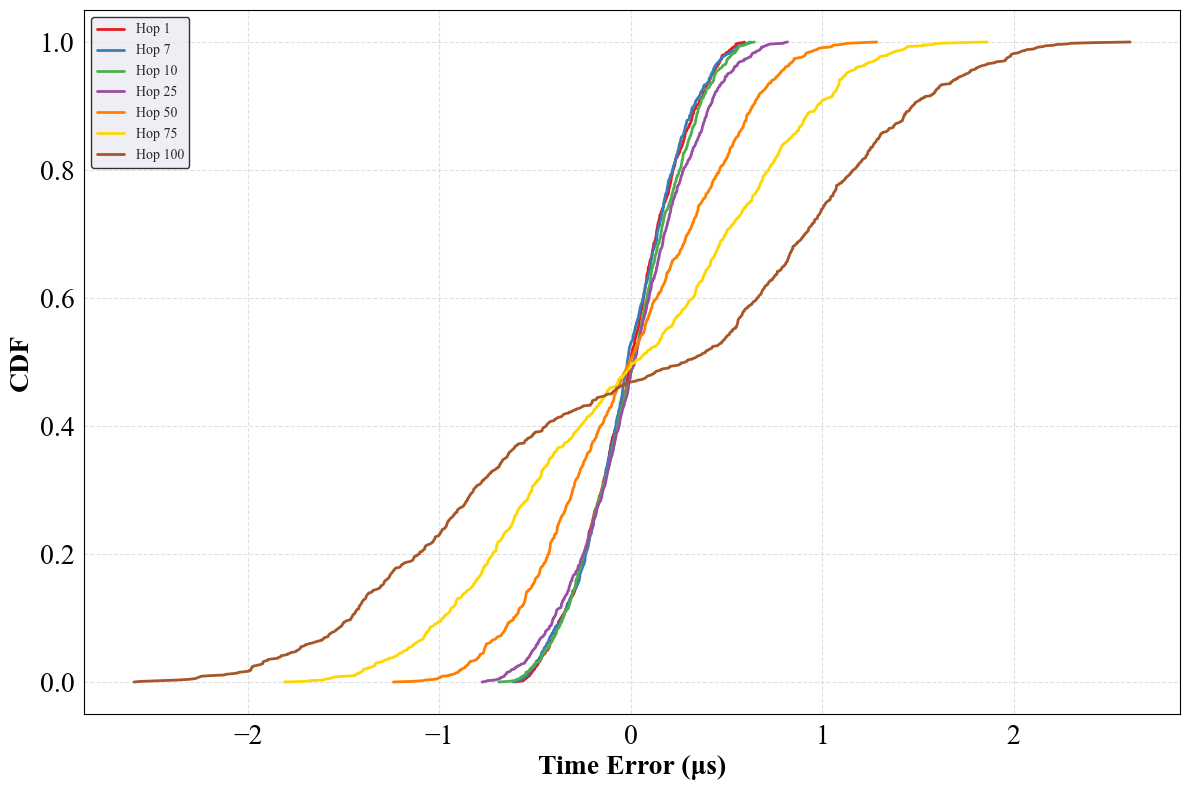

In [6]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/4/12 20:11
*  @Project :   pj_gptp_simulation
*  @Description :   从ieee8021as_simulation.py 拷贝来的版本
*  @FileName:   main.py
**************************************
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

# Create the output directory
os.makedirs("output_data", exist_ok=True)
os.makedirs("output_image", exist_ok=True)

# Parameters from the paper
PHY_JITTER_MAX = 8e-9  # 8 ns
CLOCK_GRANULARITY = 8e-9  # 8 ns
MAX_DRIFT_RATE = 10e-6  # 10 ppm
NR_ERROR = 0.1e-6  # 0.1 ppm
RESIDENCE_TIME_MAX = 1e-3  # 1 ms
DRIFT_RATE_CHANGE = 1e-6  # 漂移率变化范围：±1 ppm/s
PROPAGATION_DELAY = 25e-9  # 62 ns
SYNC_INTERVAL = 31.25e-3  # 31.25 ms
NUM_SAMPLES = 1000  # Samples per hop


def calculate_time_error(hops, sync_interval=SYNC_INTERVAL):
    """
    Calculate time synchronization error based on the paper's equations.
    """
    # 初始漂移率
    gm_drift_initial = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    node_drift_initial = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    
    # 漂移率变化率 (ppm/s)
    gm_drift_change_rate = np.random.uniform(-DRIFT_RATE_CHANGE, DRIFT_RATE_CHANGE)
    node_drift_change_rate = np.random.uniform(-DRIFT_RATE_CHANGE, DRIFT_RATE_CHANGE)
    
    # 计算漂移率变化量 (变化率 * 同步间隔)
    gm_drift_change = gm_drift_change_rate * sync_interval  # 单位：秒
    node_drift_change = node_drift_change_rate * sync_interval
    
    # 更新后的漂移率
    gm_drift = gm_drift_initial + gm_drift_change
    node_drift = node_drift_initial + node_drift_change
    
    # 基本误差计算(使用更新后的漂移率)
    basic_error = (node_drift - gm_drift) * sync_interval
    
    # 添加 NR_ERROR 影响 (±0.1 ppm)
    nr_error_contribution = np.random.uniform(-NR_ERROR, NR_ERROR) * sync_interval

    # Errors due to PHY jitter and clock granularity
    if hops > 1:
        # Timestamp error
        timestamp_error = np.random.uniform(0, PHY_JITTER_MAX) + np.random.uniform(0, CLOCK_GRANULARITY)

        # Error propagation factor based on equations (16)-(23)
        error_factor = np.random.uniform(0.5, 1.0)

        # Calculate accumulated error (grows with hop count)
        accumulated_error = timestamp_error * error_factor * hops

        # From Figure 10 - error grows faster after ~30 hops
        if hops > 30:
            accumulated_error *= 1 + (hops - 30) / 100
    else:
        accumulated_error = 0

    # Total error (now including nr_error_contribution)
    total_error = basic_error + accumulated_error + nr_error_contribution

    # Randomize sign (error can be positive or negative)
    if np.random.random() < 0.5:
        total_error = -total_error

    return total_error


# Generate data for all hops (1-100)
all_data = {}
for h in range(1, 101):
    print(f"Simulating hop {h}...")
    hop_errors = [calculate_time_error(h) for _ in range(NUM_SAMPLES)]
    all_data[h] = hop_errors

# Save to CSV with each column representing one hop
df = pd.DataFrame({hop: all_data[hop] for hop in range(1, 101)})
df.to_csv("output_data/te_data_3125ms.csv", index=False)

# Target hops for plotting
target_hops = [1, 7, 10, 25, 50, 75, 100]
colors = {
    '1': '#E41A1C',  # 深红
    '2': '#377EB8',  # 深蓝
    '3': '#4DAF4A',  # 深绿
    '4': '#984EA3',  # 紫色
    '5': '#FF7F00',  # 橙色
    '6': '#FFD700',  # 黄色
    '7': '#A65628'  # 棕色
}

# Create plot of time error distributions with modified styling
plt.figure(figsize=(12, 8), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for i, hop in enumerate(target_hops):
    # Extract data for this hop and convert to microseconds
    errors = np.array(all_data[hop])
    errors_us = errors * 1e6

    # Sort errors for CDF plot
    sorted_errors = np.sort(errors_us)
    cumulative_prob = np.linspace(0, 1, len(sorted_errors))

    plt.plot(sorted_errors, cumulative_prob,
             label=f'Hop {hop}',
             color=colors[str(i + 1)],
             linewidth=2)

# Configure plot appearance
plt.grid(True, linestyle='--', alpha=0.7, color='lightgray')  # 灰色虚线网格

# 设置坐标轴为黑色
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.xlabel('Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold', color='black')
plt.ylabel('CDF', fontname='Times New Roman', fontsize=20, fontweight='bold', color='black')

plt.legend(fontsize=20, frameon=True, shadow=False, edgecolor='black', prop={'family': 'Times New Roman'})

plt.xticks(fontname='Times New Roman', fontsize=20, color='black')
plt.yticks(fontname='Times New Roman', fontsize=20, color='black')

plt.tight_layout()
plt.savefig("output_image/time_error_cdf_3125ms.png", dpi=600, facecolor='white')
plt.show()

---

## 取自昨天的代码中最后的部分，为了画不同的时间同步间隔以及与域划分之间的多重关系。

In [8]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/4/17 19:22
*  @Project :   pj_gptp_simulation
*  @Description :   将不同时间间隔的 折线图（Line Chart），并结合了 区间填充（Shaded Area Plot）
*  @FileName:   main20250417.py
**************************************
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import time

# Create the output directories
os.makedirs("output_data", exist_ok=True)
os.makedirs("output_image", exist_ok=True)

# Parameters from the paper
PHY_JITTER_MAX = 8e-9  # 8 ns
CLOCK_GRANULARITY = 8e-9  # 8 ns
MAX_DRIFT_RATE = 10e-6  # 10 ppm
NR_ERROR = 0.1e-6  # 0.1 ppm
RESIDENCE_TIME_MAX = 1e-3  # 1 ms
PROPAGATION_DELAY = 25e-9  # 25 ns
NUM_SAMPLES = 1000  # Samples per hop
TOTAL_HOPS = 100  # Total number of hops to simulate

# Only one sync interval (in seconds)
SYNC_INTERVAL = 31.25e-3  # 31.25 ms

# Different domain sizes to test
DOMAIN_SIZES = [5, 10, 20, 50]

# Parameters for multi-domain simulation
DOMAIN_BOUNDARY_ERROR_MAX = 30e-9  # Maximum error at domain boundaries (30 ns)


def calculate_time_error(hops, sync_interval):
    """
    Calculate time synchronization error based on the paper's equations for single domain.
    """
    # Basic error from clock drift (equation 11)
    gm_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    node_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    basic_error = (node_drift - gm_drift) * sync_interval

    # Errors due to PHY jitter and clock granularity
    if hops > 1:
        # Timestamp error
        timestamp_error = np.random.uniform(0, PHY_JITTER_MAX) + np.random.uniform(0, CLOCK_GRANULARITY)

        # Error propagation factor based on equations (16)-(23)
        error_factor = np.random.uniform(0.5, 1.0)

        # Calculate accumulated error (grows with hop count)
        accumulated_error = timestamp_error * error_factor * hops

        # From Figure 10 - error grows faster after ~30 hops
        if hops > 30:
            accumulated_error *= 1 + (hops - 30) / 100
    else:
        accumulated_error = 0

    # Total error
    total_error = basic_error + accumulated_error

    # Randomize sign (error can be positive or negative)
    if np.random.random() < 0.5:
        total_error = -total_error

    return total_error


def calculate_multi_domain_time_error(total_hops, domain_size, sync_interval):
    """
    Calculate time synchronization error with multi-domain approach.

    In this approach:
    - Each domain has its own GM
    - Error only accumulates within each domain (max domain_size hops)
    - Additional errors occur at domain boundaries

    Args:
        total_hops: The total number of hops from the network entry
        domain_size: Number of hops per domain
        sync_interval: Time between synchronization messages
    """
    # Calculate which domain and which hop within that domain
    current_domain = (total_hops - 1) // domain_size + 1
    hop_within_domain = ((total_hops - 1) % domain_size) + 1

    # Calculate domain-internal error (only from current domain's GM)
    domain_error = calculate_time_error(hop_within_domain, sync_interval)

    # Add boundary errors from all previous domain crossings
    boundary_errors = 0
    if current_domain > 1:
        # Accumulate errors from each boundary crossing
        for i in range(current_domain - 1):
            boundary_error = np.random.uniform(0, DOMAIN_BOUNDARY_ERROR_MAX)
            # In real systems, boundary errors can be positive or negative
            if np.random.random() < 0.5:
                boundary_error = -boundary_error
            boundary_errors += boundary_error

    # Total error is domain-internal error plus all boundary crossing errors
    total_error = domain_error + boundary_errors

    return total_error


# Dictionary to store all simulation results
all_results = {}

# Generate data for single domain approach
print(f"Generating data for single domain approach with {SYNC_INTERVAL*1000:.3f} ms sync interval...")
start_time = time.time()

single_domain_data = {}
for h in range(1, TOTAL_HOPS + 1):
    print(f"Simulating single domain hop {h}...")
    hop_errors = [calculate_time_error(h, SYNC_INTERVAL) for _ in range(NUM_SAMPLES)]
    single_domain_data[h] = hop_errors

# Save to CSV
single_df = pd.DataFrame({hop: single_domain_data[hop] for hop in range(1, TOTAL_HOPS + 1)})
single_df.to_csv(f"output_data/single_domain_data_31.25ms_v5.csv", index=False)

# Store results
all_results["single"] = single_domain_data

print(f"Single domain simulation completed in {time.time() - start_time:.3f} seconds")

# Generate data for multi-domain approach with different domain sizes
for domain_size in DOMAIN_SIZES:
    print(f"Generating data for multi-domain approach with domain size {domain_size}...")
    start_time = time.time()
    
    multi_domain_data = {}
    for h in range(1, TOTAL_HOPS + 1):
        print(f"Simulating multi-domain hop {h} with domain size {domain_size}...")
        hop_errors = [calculate_multi_domain_time_error(h, domain_size, SYNC_INTERVAL) for _ in range(NUM_SAMPLES)]
        multi_domain_data[h] = hop_errors
    
    # Save to CSV
    multi_df = pd.DataFrame({hop: multi_domain_data[hop] for hop in range(1, TOTAL_HOPS + 1)})
    multi_df.to_csv(f"output_data/multi_domain_data_31.25ms_domain{domain_size}_v5.csv", index=False)
    
    # Store results
    all_results[f"domain{domain_size}"] = multi_domain_data
    
    print(f"Multi-domain simulation with domain size {domain_size} completed in {time.time() - start_time:.3f} seconds")

# PLOTTING SECTION

# Since we have only one sync interval, we'll create a bar chart comparing different domain sizes
plt.figure(figsize=(12, 8))

# Colors for different domain sizes
domain_colors = {
    "single": '#E41A1C',    # Single domain (red)
    "domain5": '#377EB8',   # Domain size 5 (blue)
    "domain10": '#4DAF4A',  # Domain size 10 (green)
    "domain20": '#984EA3',  # Domain size 20 (purple)
    "domain50": '#FF7F00',  # Domain size 50 (orange)
}

# Labels for the x-axis
labels = ["No Domain Division", "Domain Size: 5", "Domain Size: 10", "Domain Size: 20", "Domain Size: 50"]

# Get median error values for each configuration
median_values = []

# Single domain
single_errors = np.abs(np.array(all_results["single"][TOTAL_HOPS]) * 1e6)
median_values.append(np.median(single_errors))

# Multi-domain
for domain_size in DOMAIN_SIZES:
    multi_errors = np.abs(np.array(all_results[f"domain{domain_size}"][TOTAL_HOPS]) * 1e6)
    median_values.append(np.median(multi_errors))

# Create bar chart
bar_positions = np.arange(len(labels))
bars = plt.bar(bar_positions, median_values, width=0.6, 
        color=[domain_colors["single"], domain_colors["domain5"], domain_colors["domain10"], 
               domain_colors["domain20"], domain_colors["domain50"]])

# Add annotations for each bar
for i, (bar, value) in enumerate(zip(bars, median_values)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 0.1, 
             f'{value:.3f}μs', ha='center', va='bottom',
             fontsize=14, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.8))

# Configure plot appearance
plt.grid(True, alpha=0.3, axis='y')
plt.xlabel('Domain Configuration', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('Median Absolute Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.xticks(bar_positions, labels, fontname='Times New Roman', fontsize=16, rotation=15)
plt.yticks(fontname='Times New Roman', fontsize=20)
plt.title(f'Impact of Domain Size on Time Error with 31.25ms Sync Interval (Hop {TOTAL_HOPS})',
          fontname='Times New Roman', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.savefig("output_image/sync_interval_impact_analysis_20250417.png", dpi=600)
plt.close()

# Also create an alternative line chart to show error progression across hops
plt.figure(figsize=(12, 8))

# Plot error progression for each domain configuration
sample_hops = list(range(1, TOTAL_HOPS + 1, 5))  # Sample every 5 hops for clarity

configs = [("single", "No Domain Division"), 
           ("domain5", "Domain Size: 5"), 
           ("domain10", "Domain Size: 10"),
           ("domain20", "Domain Size: 20"), 
           ("domain50", "Domain Size: 50")]

for config_key, config_label in configs:
    # Prepare data
    medians = []
    q1 = []
    q3 = []
    
    for h in sample_hops:
        errors = np.abs(np.array(all_results[config_key][h]) * 1e6)
        medians.append(np.median(errors))
        q1.append(np.percentile(errors, 25))
        q3.append(np.percentile(errors, 75))
    
    # Plot median line with corresponding color
    plt.plot(sample_hops, medians, '-', color=domain_colors[config_key], 
             linewidth=2, label=config_label)
    
    # Add shaded area for quartiles
    plt.fill_between(sample_hops, q1, q3, color=domain_colors[config_key], alpha=0.2)
    
    # Add vertical lines at domain boundaries for multi-domain
    if config_key != "single":
        domain_size = int(config_key.replace("domain", ""))
        num_domains = TOTAL_HOPS // domain_size
        for i in range(1, num_domains):
            boundary = i * domain_size
            plt.axvline(x=boundary, color=domain_colors[config_key], linestyle='--', alpha=0.3)

# Configure plot appearance
plt.grid(True, alpha=0.3)
plt.xlabel('Hop Number', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('Absolute Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.legend(fontsize=20, frameon=True, shadow=False, edgecolor='black',
           prop={'family': 'Times New Roman'}, loc='best')
plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)
plt.title('Absolute Time Error vs. Hop Number for Different Domain Sizes (31.25ms Sync Interval)',
          fontname='Times New Roman', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.savefig("output_image/hop_vs_error_by_domain_size_3125ms_20250417_v2.png", dpi=300)
plt.close()

print("Simulation complete. Results saved to output_data/ and output_image/ directories.")

Generating data for single domain approach with 31.250 ms sync interval...
Simulating single domain hop 1...
Simulating single domain hop 2...
Simulating single domain hop 3...
Simulating single domain hop 4...
Simulating single domain hop 5...
Simulating single domain hop 6...
Simulating single domain hop 7...
Simulating single domain hop 8...
Simulating single domain hop 9...
Simulating single domain hop 10...
Simulating single domain hop 11...
Simulating single domain hop 12...
Simulating single domain hop 13...
Simulating single domain hop 14...
Simulating single domain hop 15...
Simulating single domain hop 16...
Simulating single domain hop 17...
Simulating single domain hop 18...
Simulating single domain hop 19...
Simulating single domain hop 20...
Simulating single domain hop 21...
Simulating single domain hop 22...
Simulating single domain hop 23...
Simulating single domain hop 24...
Simulating single domain hop 25...
Simulating single domain hop 26...
Simulating single domain

---

# 折线图

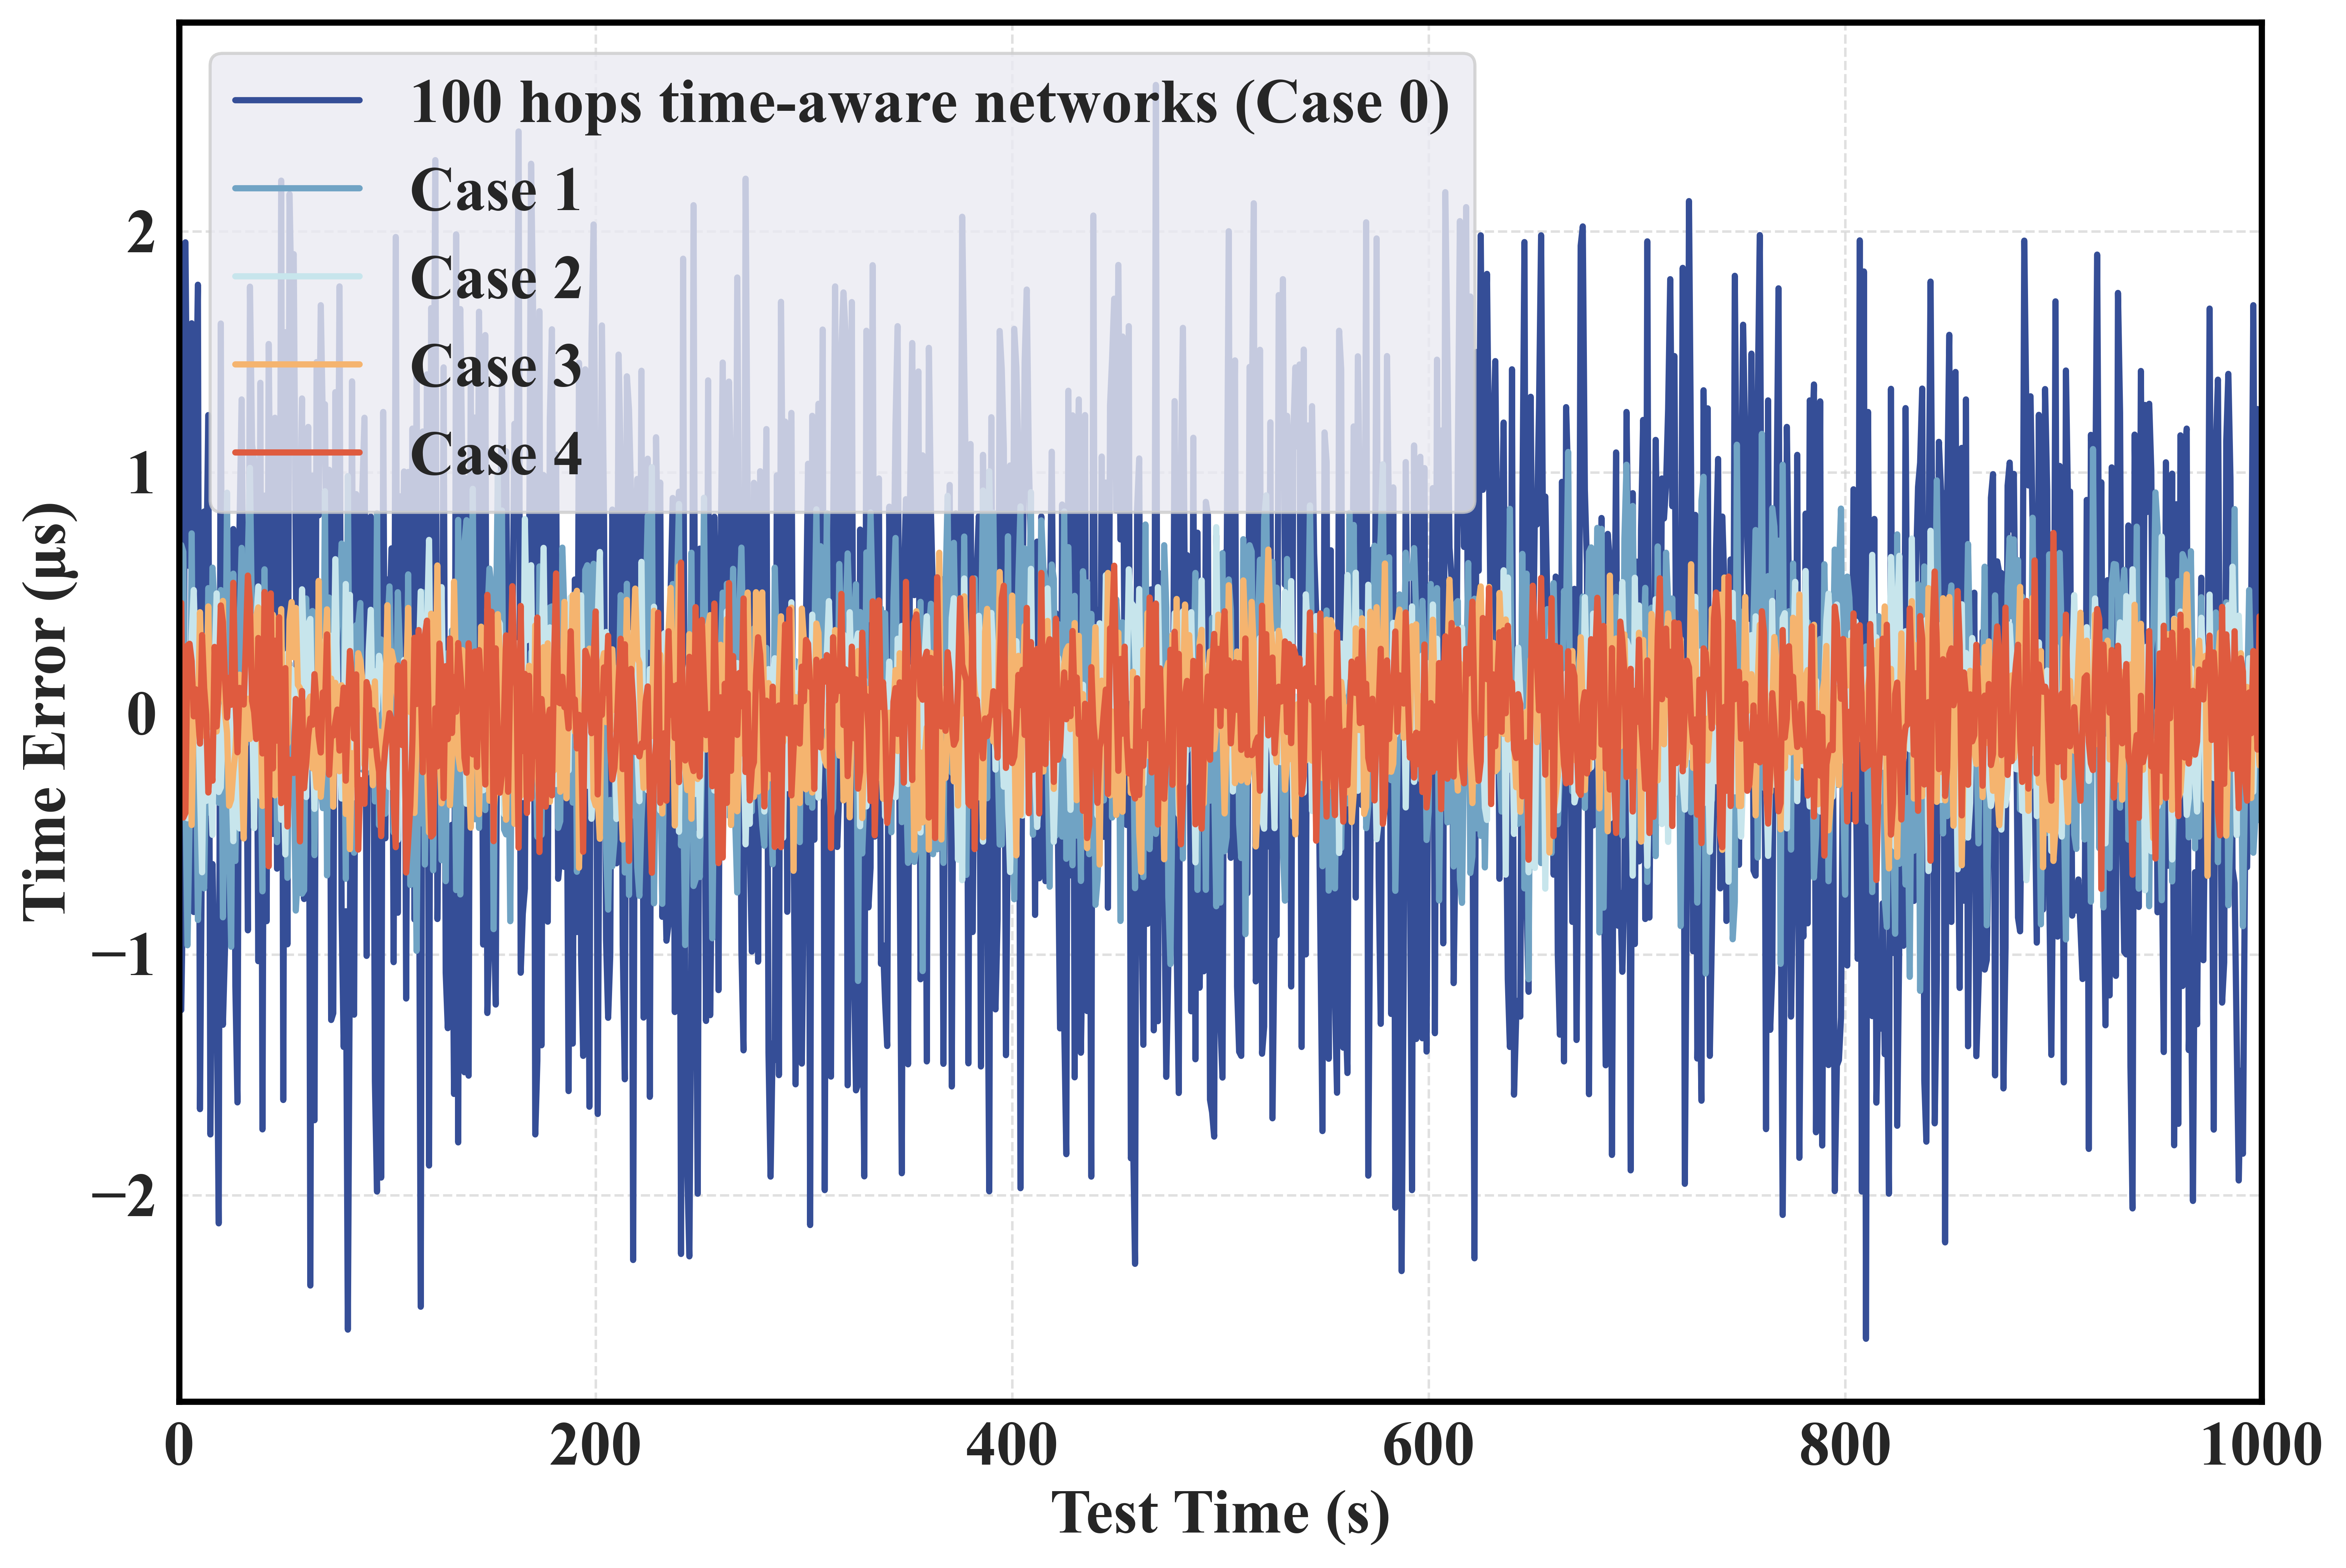

主图已保存到output_image文件夹中


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.font_manager import FontProperties

# 设置全局字体为Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 20

# 定义文件路径
file_paths = [
    r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250417\output_data\te_data_3125ms.csv",
    r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\multi_domain_data_xlarge_v3.csv",
    r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\multi_domain_data_large_v3.csv",
    r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\multi_domain_data_medium_v3.csv",
    r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\multi_domain_data_small_v3.csv"
]

# 定义图例标签
labels = [
    "100 hops time-aware networks (Case 0)",
    "Case 1",
    "Case 2",
    "Case 3",
    "Case 4"
]

# 定义颜色
colors = ['#354e97', '#70a3c4', '#c7e5ec', '#f5b46f', '#df5b3f']

# 存储处理后的数据
processed_data = []

# 循环处理每个文件
for file_path in file_paths:
    try:
        # 读取CSV文件
        df = pd.read_csv(file_path)
        
        # 提取"100"列数据
        column_data = df["100"].values
        
        # 将科学计数法的秒转换为微秒，并保留小数点后3位
        # 1秒 = 1,000,000微秒
        microseconds_data = [round(float(value) * 1000000, 3) for value in column_data]
        
        # 添加到处理后的数据列表
        processed_data.append(microseconds_data)
        
    except Exception as e:
        print(f"处理文件 {file_path} 时出错: {e}")
        # 如果出错，添加空列表
        processed_data.append([])

# 创建主图
fig, ax = plt.subplots(figsize=(12, 8), dpi=600)
# 设置整个图形的背景为白色
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# 设置x轴的范围
x_max = 1000
for i, data in enumerate(processed_data):
    if len(data) > 0:
        # 确保数据长度不超过x_max+1
        if len(data) > x_max + 1:
            data = data[:x_max + 1]
        
        # 创建对应的x轴数据
        x = np.arange(len(data))
        
        # 绘制折线图
        ax.plot(x, data, color=colors[i], linewidth=2, label=labels[i])

# 设置图表属性
ax.set_xlabel('Test Time (s)', fontweight='bold')
ax.set_ylabel('Time Error (μs)', fontweight='bold')
ax.set_xlim(0, x_max)

# 设置图例在左上角
ax.legend(loc='upper left', frameon=True)

# 设置x轴和y轴为黑色加粗
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(2)

# 设置网格为浅灰色虚线
ax.grid(True, linestyle='--', alpha=0.7, color='lightgray')

# 创建输出目录
output_dir = 'output_image'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 保存图片
plt.savefig(os.path.join(output_dir, 'gptp_time_error_main.png'), 
            dpi=600, 
            bbox_inches='tight',  
            transparent=False)

# 显示图像
plt.show()

print("主图已保存到output_image文件夹中")

---
# CDF

处理文件 D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250417\output_image\time_error_cdf_3125ms.png 时出错: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte


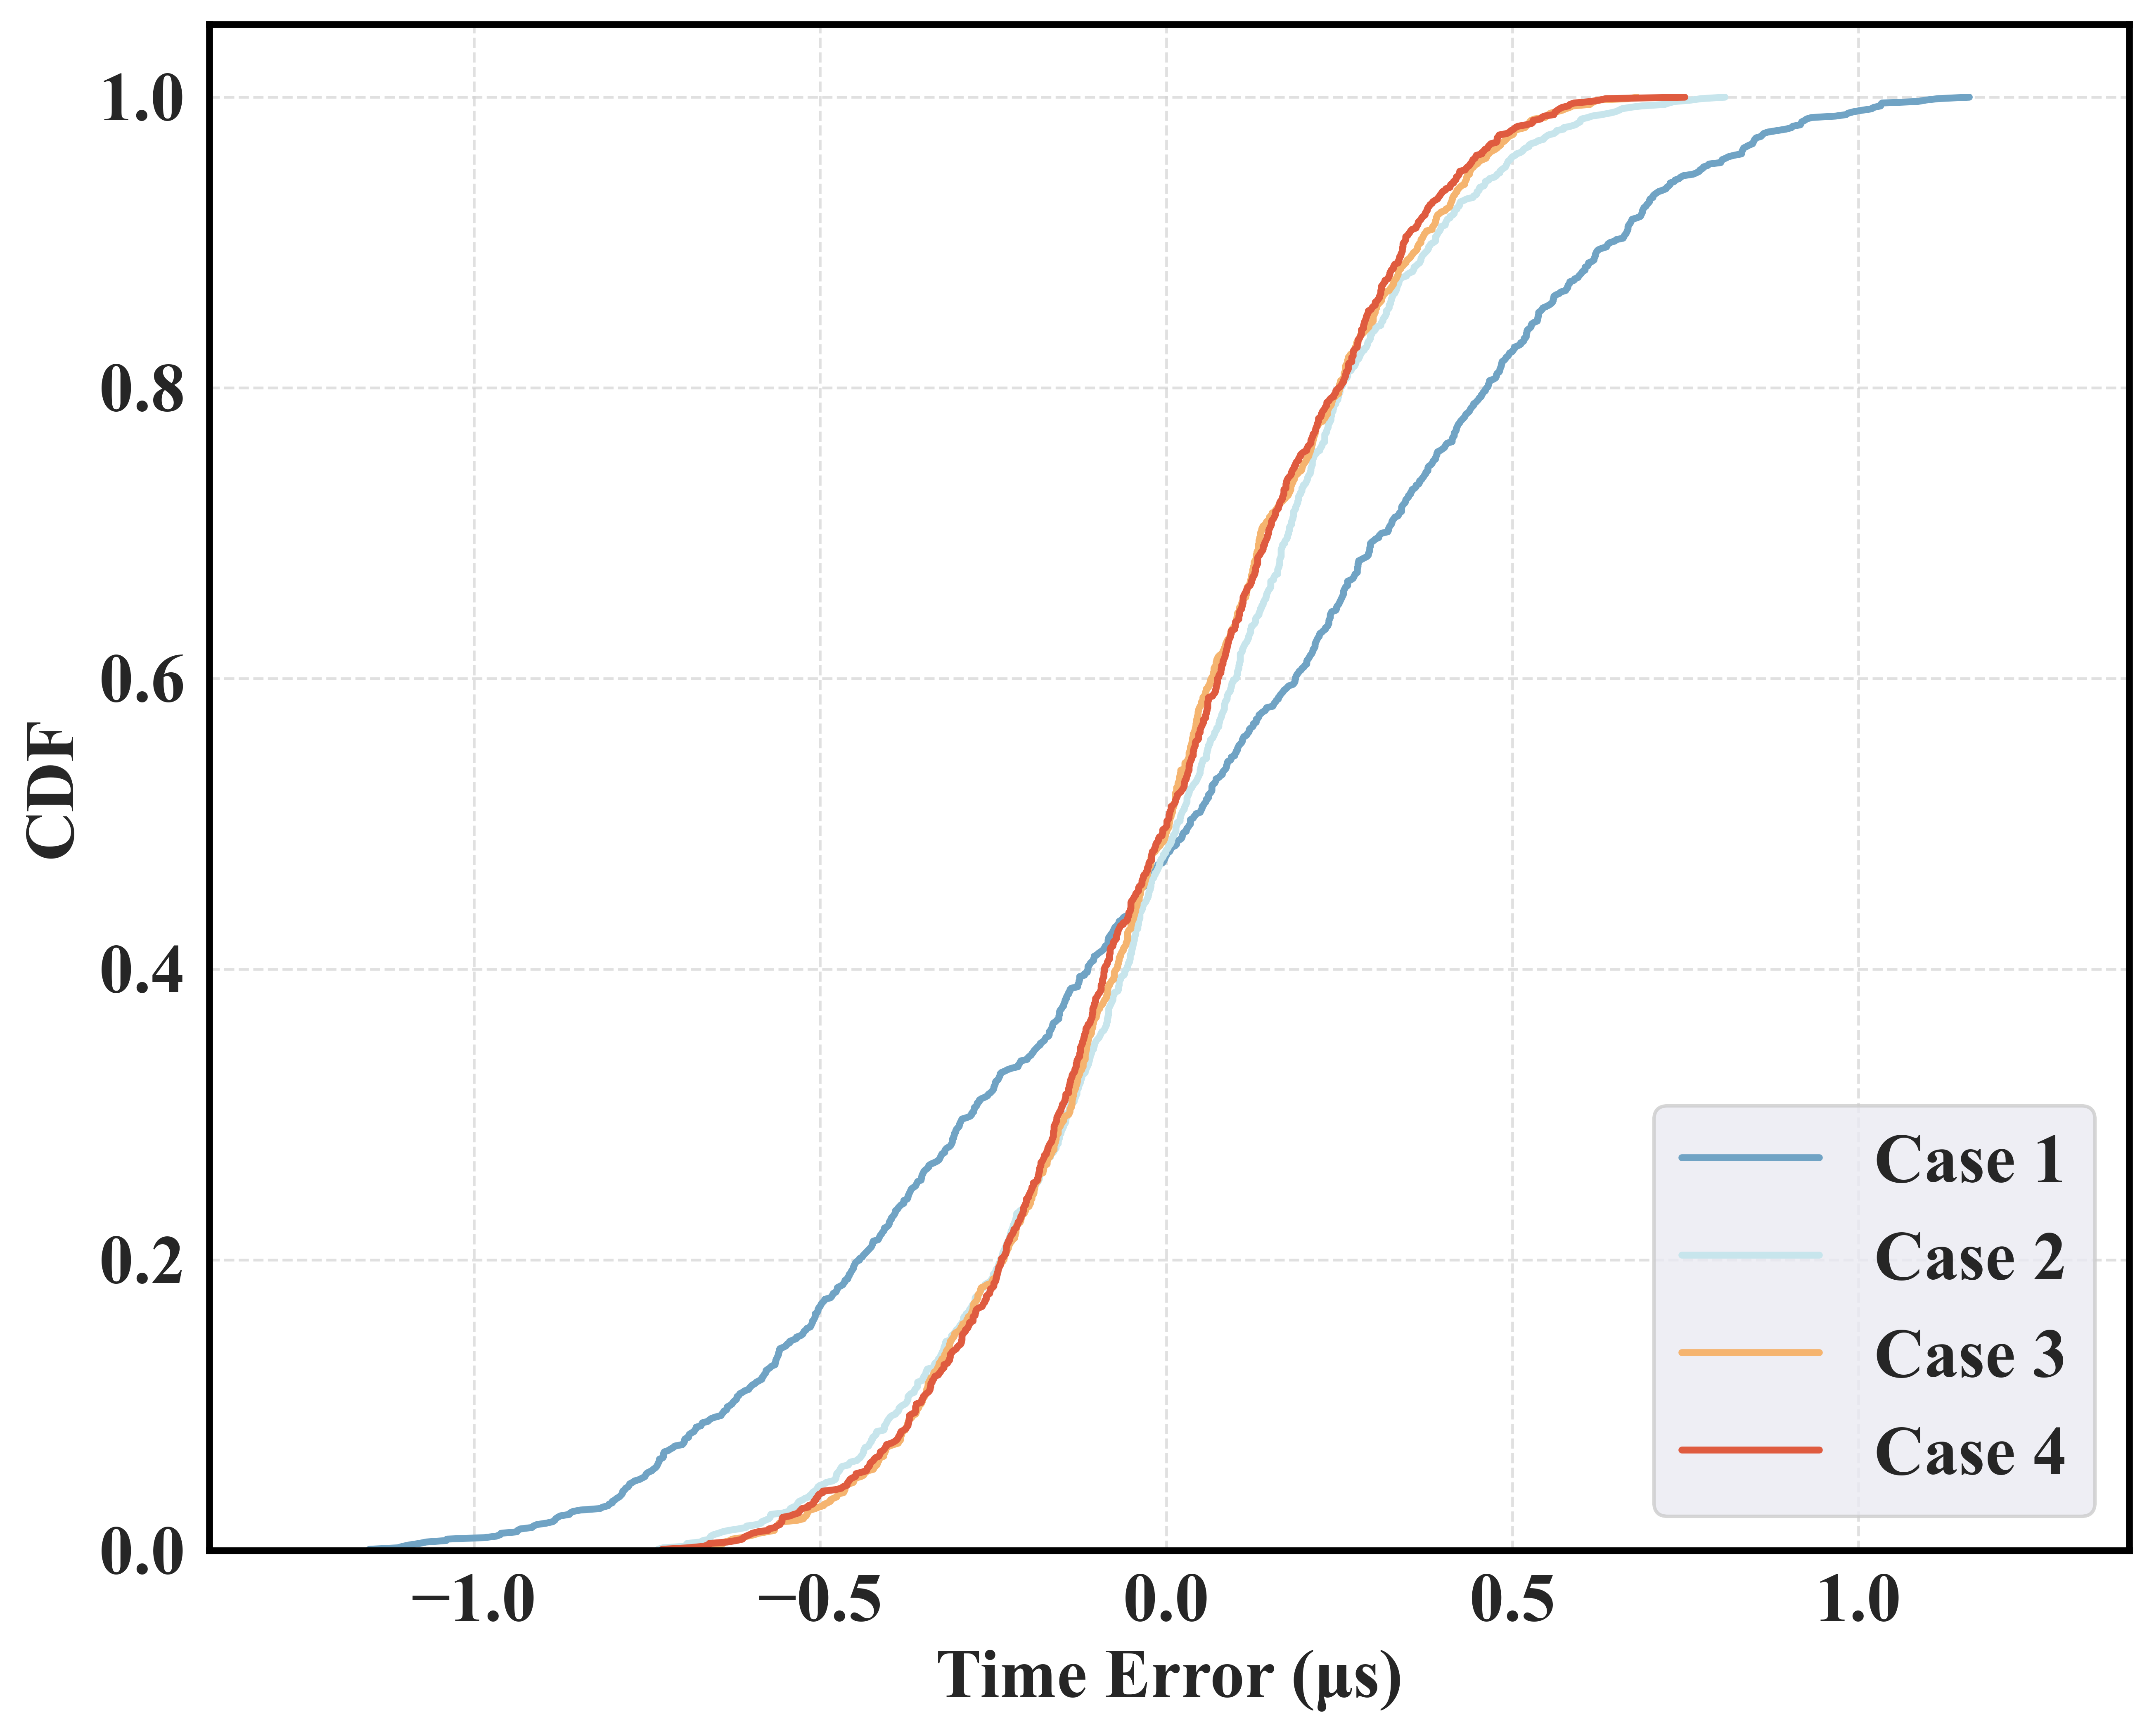

CDF图已保存到output_image文件夹中


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.font_manager import FontProperties

# 设置全局字体为Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 20

# 定义文件路径
file_paths = [
    r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250417\output_image\time_error_cdf_3125ms.png",
    r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\multi_domain_data_xlarge_v3.csv",
    r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\multi_domain_data_large_v3.csv",
    r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\multi_domain_data_medium_v3.csv",
    r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\multi_domain_data_small_v3.csv"
]

# 定义图例标签
labels = [
    "100 hops time-aware networks (Case 0)",
    "Case 1",
    "Case 2",
    "Case 3",
    "Case 4"
]

# 定义颜色
colors = ['#354e97', '#70a3c4', '#c7e5ec', '#f5b46f', '#df5b3f']

# 存储处理后的数据
processed_data = []

# 循环处理每个文件
for file_path in file_paths:
    try:
        # 读取CSV文件
        df = pd.read_csv(file_path)
        
        # 提取"100"列数据
        column_data = df["100"].values
        
        # 将科学计数法的秒转换为微秒，并保留小数点后3位
        # 1秒 = 1,000,000微秒
        microseconds_data = [round(float(value) * 1000000, 3) for value in column_data]
        
        # 添加到处理后的数据列表
        processed_data.append(microseconds_data)
        
    except Exception as e:
        print(f"处理文件 {file_path} 时出错: {e}")
        # 如果出错，添加空列表
        processed_data.append([])

# 创建CDF图
fig, ax = plt.subplots(figsize=(10, 8), dpi=600)
# 设置整个图形的背景为白色
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# 预处理数据，确定CDF图的实际数据范围
all_data_values = []
for data in processed_data:
    if len(data) > 0:
        all_data_values.extend(data)

if all_data_values:
    data_min = min(all_data_values)
    data_max = max(all_data_values)
    # 添加一些边距
    data_range = data_max - data_min
    x_min_cdf = data_min - data_range * 0.1
    x_max_cdf = data_max + data_range * 0.1
else:
    x_min_cdf, x_max_cdf = -1, 1  # 默认值，如果没有数据

# 设置CDF图的范围
ax.set_xlim(x_min_cdf, x_max_cdf)
ax.set_ylim(0, 1.05)

# 绘制每组数据的CDF
for i, data in enumerate(processed_data):
    if len(data) > 0:
        # 计算CDF
        data_sorted = np.sort(data)
        # 计算累积概率
        cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
        
        # 绘制CDF曲线
        ax.plot(data_sorted, cdf, color=colors[i], linewidth=2, label=labels[i])

# 设置图表属性
ax.set_xlabel('Time Error (μs)', fontweight='bold')
ax.set_ylabel('CDF', fontweight='bold')

# 设置图例
ax.legend(loc='lower right', frameon=True)

# 设置x轴和y轴为黑色加粗
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(2)

# 设置网格为浅灰色虚线
ax.grid(True, linestyle='--', alpha=0.7, color='lightgray')

# 创建输出目录
output_dir = 'output_image'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 保存图片
plt.savefig(os.path.join(output_dir, 'gptp_time_error_cdf.png'), 
            dpi=600, 
            bbox_inches='tight',  
            transparent=False)

# 显示图像
plt.show()

print("CDF图已保存到output_image文件夹中")